## Data Munging

In [2]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [14]:
data_dir = 'MobiAct_Dataset_v1.0/MobiAct_Dataset/'
types = ['BSC', 'CSI', 'CSO', 'FKL', 'FOL', 'JOG', 'JUM', 'SCH', 'SDL', 'STD', 'STN', 'STU', 'WAL']
fall_types = ['FOL', 'FKL', 'BSC', 'SDL']
trials = {'BSC': 3, 'CSI': 8, 'CSO': 6, 'FKL': 3, 'FOL': 3, 'JOG': 3, 'JUM': 3,
          'SCH': 6, 'SDL': 3, 'STD': 1, 'STN': 6, 'STU': 6, 'WAL': 1}
n_subjects = 57

In [15]:
def convert_file(fname):
    contents = open(fname, 'r').read()
    lines = contents.split('\n')
    data = []
    start_collect = False
    for l in lines:
        if start_collect and not l == '':
            row = [float(i) for i in l.split(', ')]
            data.append(row)
        if l == '@DATA':
            start_collect = True
    return data

In [16]:
all_data = {}
missed = 0
for typ in types:
    all_data[typ] = {}
    for subject in range(1, n_subjects+1):
        for trial in range(1, trials[typ] + 1):
            acc_filename = data_dir + typ + '/' + typ + '_acc_' + str(subject) + '_' + str(trial) + '.txt'
            try:
                acc_data = convert_file(acc_filename)
                all_data[typ][str(subject) + '_' + str(trial)] = acc_data
            except FileNotFoundError: # missing data for that patient
                missed += 1

In [17]:
print(missed)

438


FOL


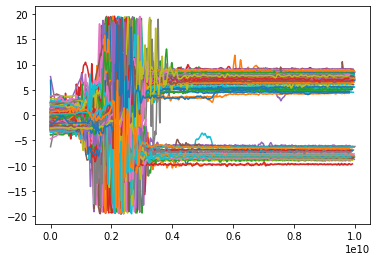

FKL


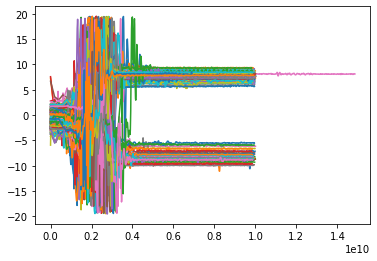

BSC


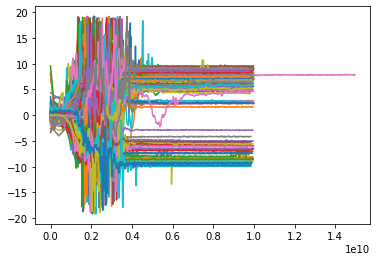

SDL


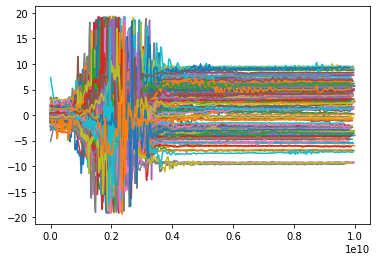

In [18]:
for fall_type in fall_types:
    print(fall_type)
    for key in all_data[fall_type]:
        data = all_data[fall_type][key]
        elapsed = [r[0] - data[0][0] for r in data]
        zacc = [r[3] for r in data]
        plt.plot(elapsed, zacc)
    plt.show()
    plt.close()

FALL BSC


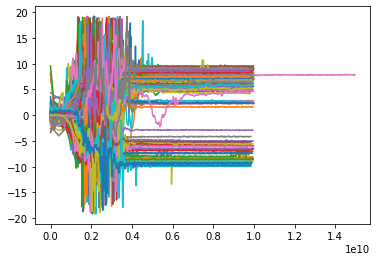

CSI


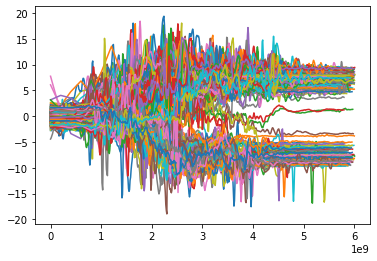

CSO


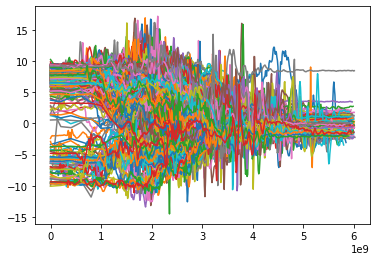

FALL FKL


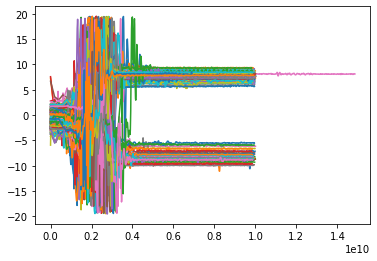

FALL FOL


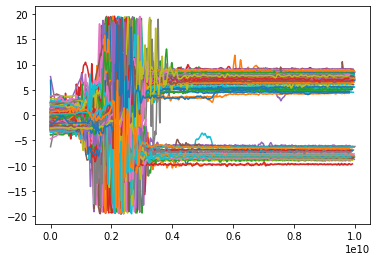

JOG


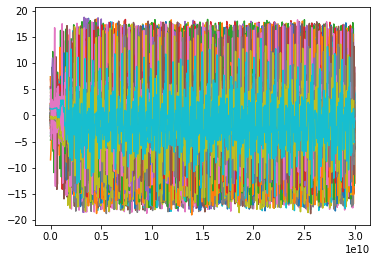

JUM


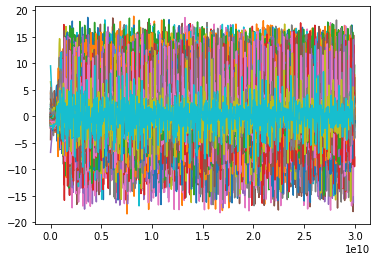

SCH


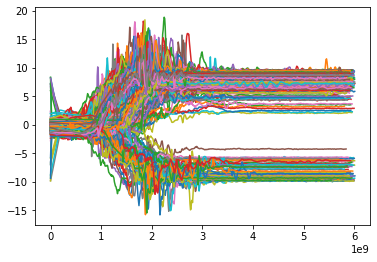

FALL SDL


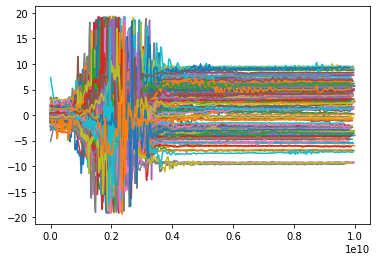

STD


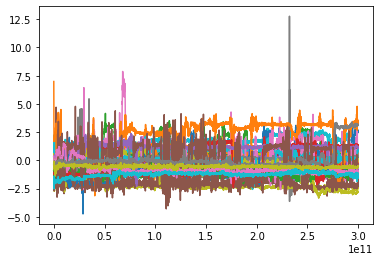

STN


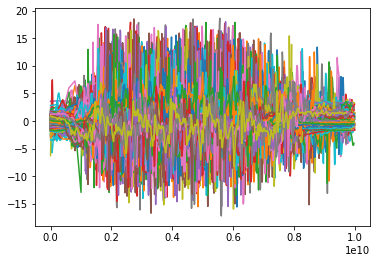

STU


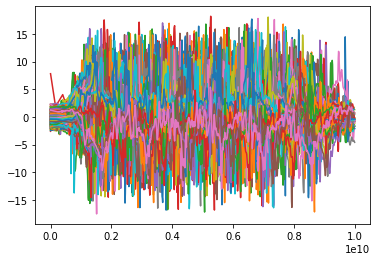

WAL


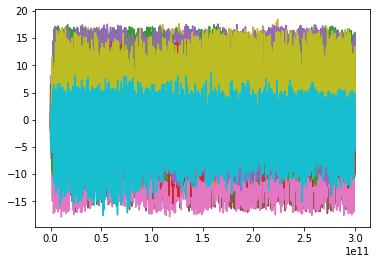

In [19]:
for typ in types:
    print(typ if typ not in fall_types else 'FALL ' + typ)
    for key in all_data[typ]:
        data = all_data[typ][key]
        elapsed = [r[0] - data[0][0] for r in data]
        zacc = [r[3] for r in data]
        plt.plot(elapsed, zacc)
    plt.show()
    plt.close()